In [317]:
import pandas as pd
import numpy as np
import OpenBlender
import json
pn.extension('plotly')
from matplotlib import pyplot as plt

import seaborn as sns
import panel as pn
import hvplot.pandas
import pandas as pd
from dotenv import load_dotenv
import warnings
import plotly.graph_objs as go
import seaborn as sns
import holoviews as hv
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from PIL import Image


Shape before removing same tweets (1884126, 9)
Shape after removing samee tweets:  (1861016, 9)
Number of tweets removed:  23110
Shape before removing same prices:  (12618, 7)
Shape after removing same prices:  (12479, 7)
Number of values removed:  139


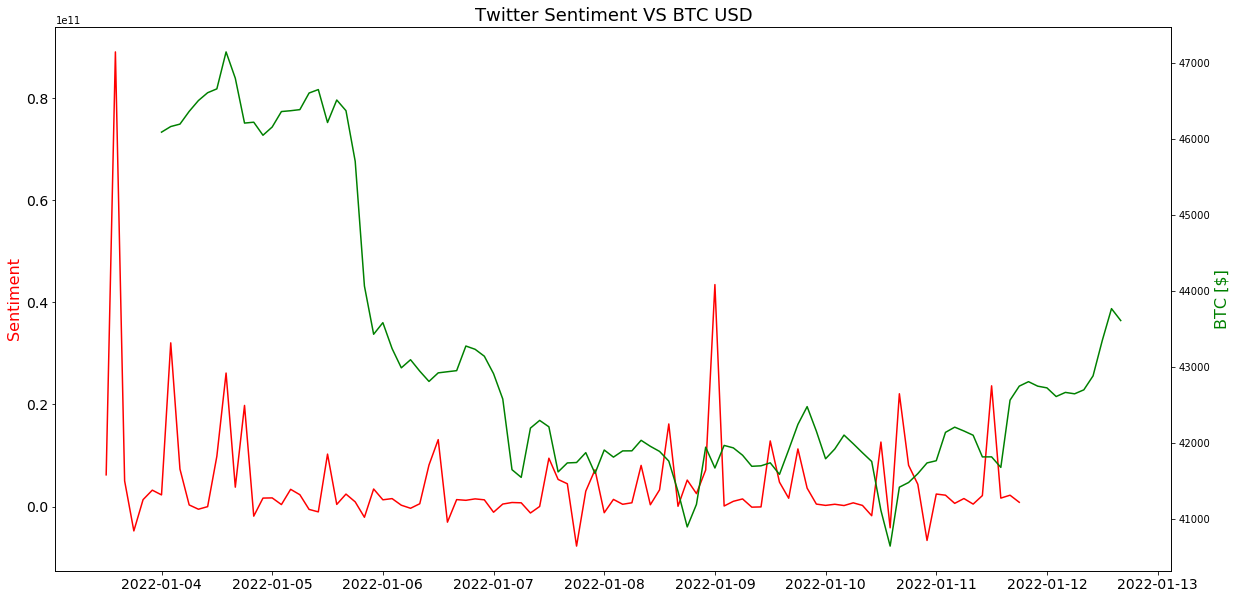

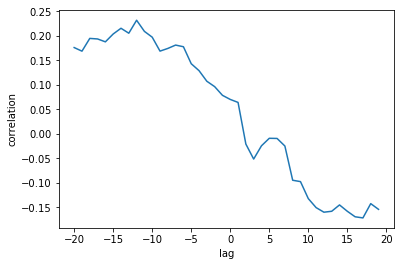

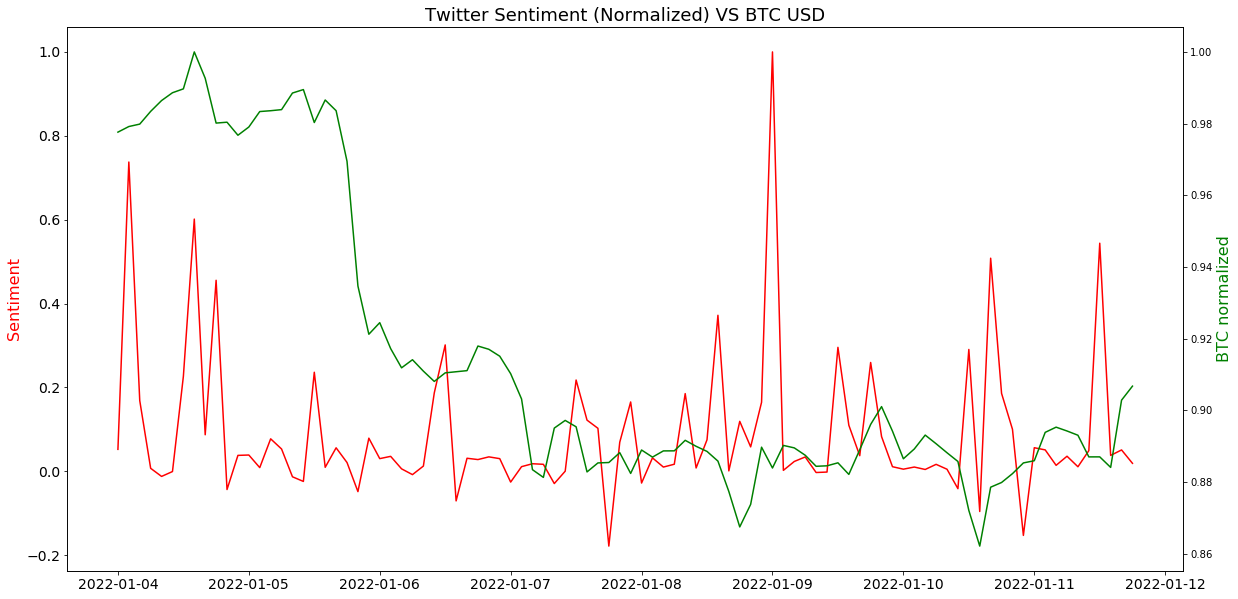

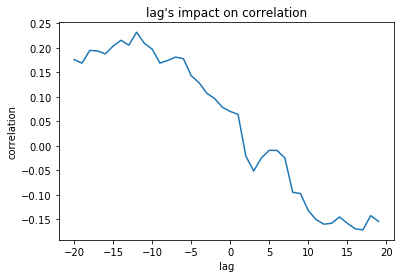

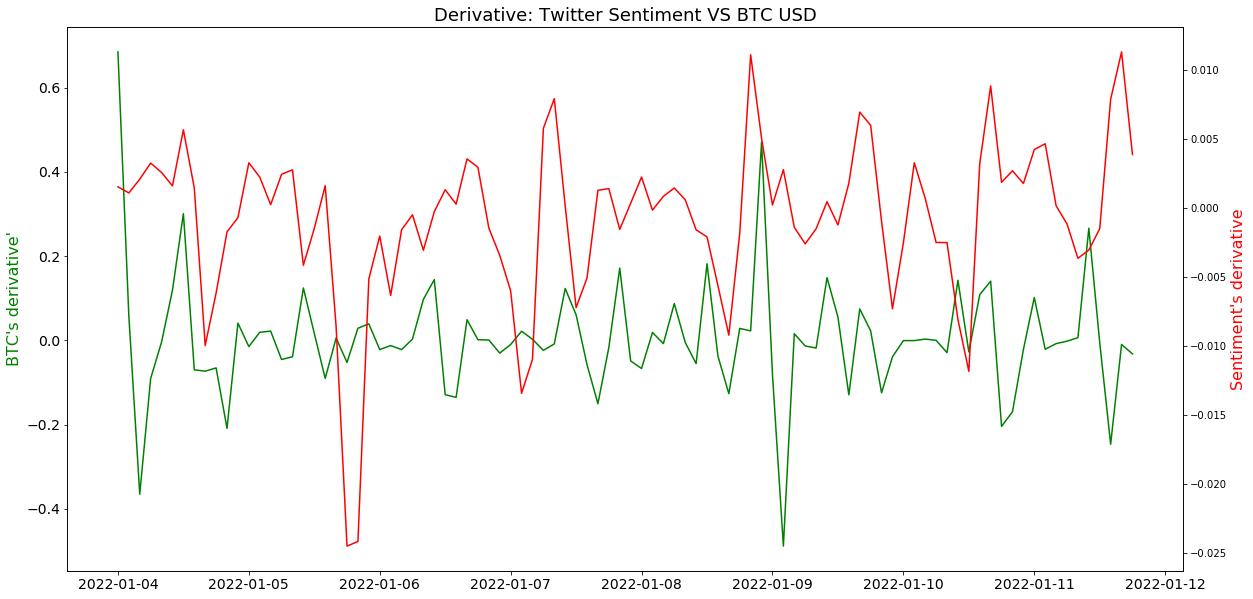

In [318]:
%run antonio_analysis.ipynb

In [457]:
def openBlender_plot():
    data = pd.read_csv('data/input_data.csv')
    plt.subplots(figsize=(10,6))
    target_data = data.copy()
    target_data["target"]=target_data["target"].astype(str)
    plot=sns.histplot(data=target_data,x="target",hue="target",palette=["#d1120f","#006400"],legend="target")
    plt.title("Count of Target Labels")
    plt.legend(title='Label', loc='upper right', labels=['Rise', 'Fall'])
    return figure

def OpenBlender_test():
    image = Image.open(r"../images/count_target_labels.png") 
    return image

def Google_Trends():
    image = Image.open(r"../images/google_trends.png") 
    return image

def Sentiment_Analysis():
    image = Image.open(r"../images/sentiment-analysis.jpeg")
    return image

def GoogleTrendsData():
    image = Image.open(r"../images/google_trends_data.png")
    return image

In [381]:
def GoogleTrends_tt_plot():
    history = pd.read_csv('data/gt_history.csv')
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='test')
    plt.title("Test and Train set Loss Value Rate")
    plt.xlabel('Epochs Number', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.legend()
    plt.savefig('../images/gt_tt_plot.png')
    image = Image.open(r"../images/gt_tt_plot.png")
    return image
    


In [392]:
def GoogleTrends_pred_plot():
    fig = plt.figure()
    train_size=70
    actual = pd.read_csv('data/gt_actual.csv')
    final = pd.read_csv('data/gt_final.csv')
    plt.plot(actual.BTC_USD, 'b', label='Original Set')
    plt.plot(final.BTC_USD[0:train_size], 'r' , label='Training set')
    plt.plot(final.BTC_USD[train_size:], 'g' , label='Predicted/Test set')
    plt.title("Bitcoin Predicted Prices")
    plt.ylabel('BitCoin Price Trend', fontsize=12)
    plt.legend(loc='best')
    plt.savefig("../images/gt_pred.png")
    image = Image.open(r"../images/gt_pred.png")
    return image

    

In [358]:
def TwitterSentimentVBTC():
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.set_title(f"Twitter Sentiment VS {symbol} USD", fontsize=18)
    ax1.tick_params(labelsize=14)
    ax2 = ax1.twinx()
    ax1.plot_date(tweets_grouped.index, tweets_grouped, 'r-')
    ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'g-')

    ax1.set_ylabel("Sentiment", color='r', fontsize=16)
    ax2.set_ylabel(f"{symbol} [$]", color='g', fontsize=16)
    return fig


In [405]:
def TwitterSentimentVBTC_corr():
    fig = plt.figure()
    xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag = i) for i in range(-20,20)]
    plt.plot(range(-20,20), xcov)
    plt.xlabel("lag")
    plt.ylabel("correlation")
    plt.savefig("../images/twitter_corr.png")
    image = Image.open(r"../images/twitter_corr.png")
    return image


In [415]:
def TwitterNormalized():
    fig = plt.figure()
    tweets_grouped_normalized = tweets_grouped / max(tweets_grouped.max(), abs(tweets_grouped.min()))
    crypto_usd_grouped_normalized = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))

    fig, ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title(f"Twitter Sentiment (Normalized) VS {symbol} USD", fontsize=18)
    ax1.tick_params(labelsize=14)

    ax2 = ax1.twinx()
    ax1.plot_date(tweets_grouped_normalized.index, tweets_grouped_normalized, 'r-')
    ax2.plot_date(crypto_usd_grouped_normalized.index, crypto_usd_grouped_normalized, 'g-')

    ax1.set_ylabel("Sentiment", color='r', fontsize=16)
    ax2.set_ylabel(f"{symbol} normalized", color='g', fontsize=16)

    plt.savefig("../images/twitter_norm.png")
    image = Image.open(r"../images/twitter_norm.png")
    return image

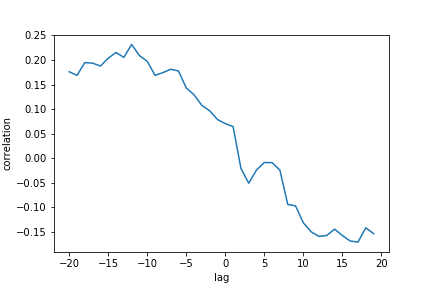

In [449]:
def TwitterNormalizedCorr():
    image = Image.open(r"../images/twitter_corr.png")
    return image

TwitterNormalizedCorr()

In [450]:
def DervTwitter():
    fig = plt.figure()
    fig, ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title(f"Derivative: Twitter Sentiment VS {symbol} USD", fontsize=18)
    ax1.tick_params(labelsize=14)

    ax2 = ax1.twinx()
    ax1.plot_date(tweets_grouped_derivative.index, tweets_grouped_derivative, 'g-')
    ax2.plot_date(crypto_usd_grouped_derivative.index, crypto_usd_grouped_derivative, 'r-')

    ax1.set_ylabel(f"{symbol}'s derivative'", color='g', fontsize=16)
    ax2.set_ylabel("Sentiment's derivative", color='r', fontsize=16)
    
    plt.savefig("../images/twitter_derv.png")
    image = Image.open(r"../images/twitter_derv.png")
    return image

In [451]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""
## Crypto Sentiment
""")

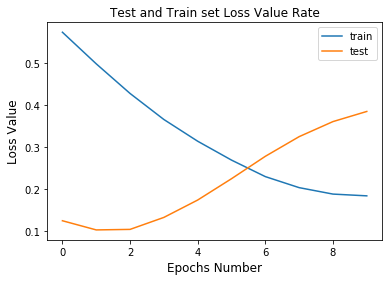

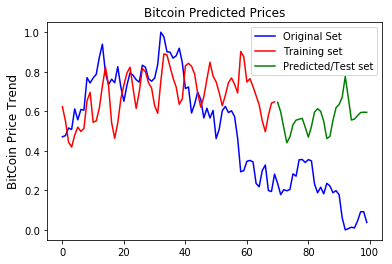

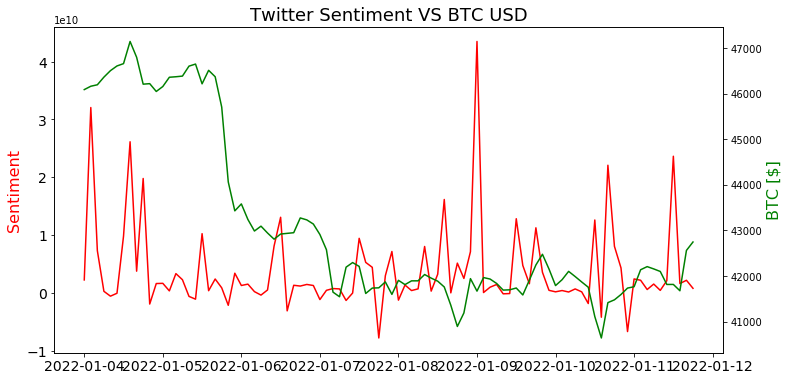

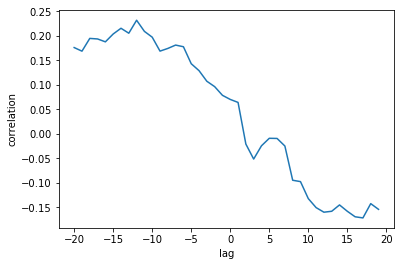

<Figure size 432x288 with 0 Axes>

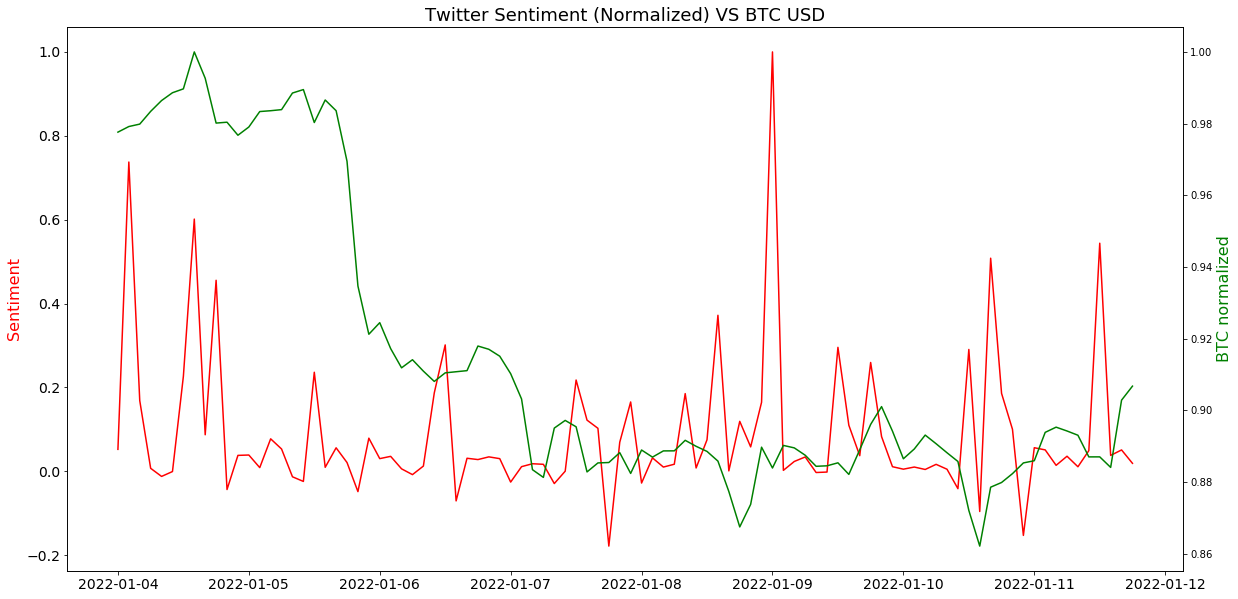

<Figure size 432x288 with 0 Axes>

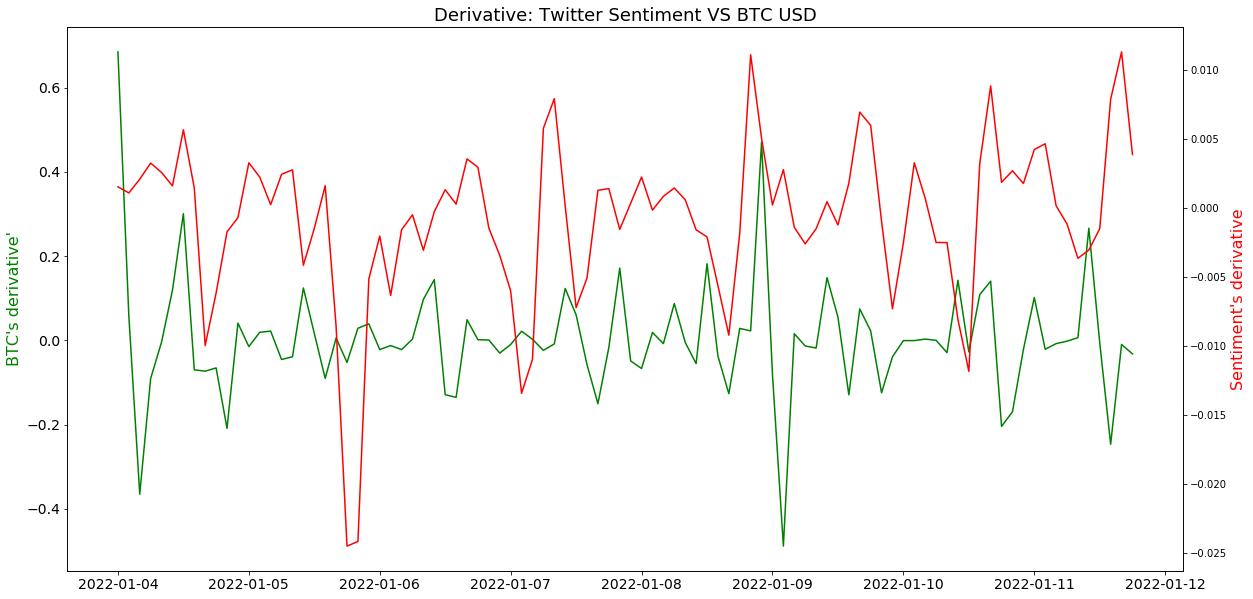

In [459]:
tabs = pn.Tabs(
    ("OpenBlender", pn.Column(OpenBlender_test)),
    ("Sentiment Analysis", pn.Column(Sentiment_Analysis)),
    ("Google Trends Data", pn.Column(GoogleTrendsData)),
    ("Google Trends Test&Train", pn.Column(GoogleTrends_tt_plot)),
    ("Google Trends Predictions", pn.Column(GoogleTrends_pred_plot)),
    ("Google Trends Hits vs. BTC", pn.Column(Google_Trends)),
    ("Twitter Sentiment vs. BTC", pn.Column(TwitterSentimentVBTC)),
    ("Twitter Sentiment vs. BTC Corr", pn. Column(TwitterSentimentVBTC_corr)),
    ("Twitter Normalized", pn.Column(TwitterNormalized)),
    ("Twitter Normalized Corr", pn.Column(TwitterNormalizedCorr)),
    ("Twitter Derivative", pn.Column(DervTwitter))
    
    )


In [460]:
dashboard = pn.Column(title, tabs)
#pn.extension()


In [ ]:
dashboard


In [ ]:
dashboard.show()
